In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf

In [16]:
train = pd.read_csv('train_fuSp8nd.csv')
test =pd.read_csv('test_B0QdNpj.csv')

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5435 entries, 0 to 5434
Data columns (total 2 columns):
ID       5435 non-null int64
Class    5435 non-null object
dtypes: int64(1), object(1)
memory usage: 85.0+ KB


In [1]:
# train

In [14]:
import librosa
from librosa import display

In [3]:
import glob

In [6]:
data , sampling_rate = librosa.load('Train/2022.wav')

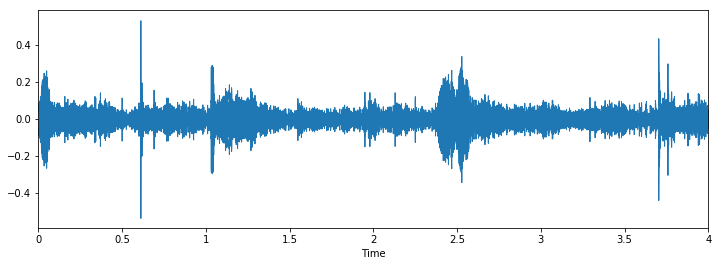

In [15]:
plt.figure(figsize =(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

In [18]:
train.index

RangeIndex(start=0, stop=5435, step=1)

In [24]:
import os

In [31]:
i = np.random.choice(train.index)
audio_name = train.ID[i]

In [35]:
x, sr = librosa.load('Train' + '/' + str(train.ID[i]) + '.wav')  

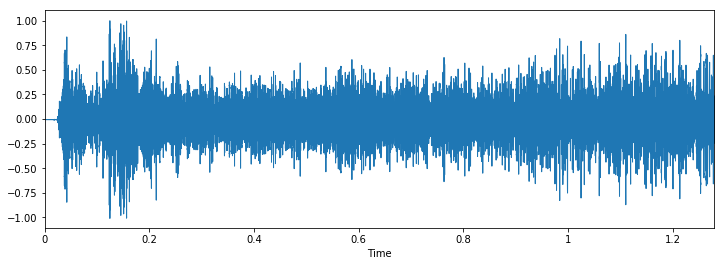

In [36]:
plt.figure(figsize = (12,4))
librosa.display.waveplot(x , sr = sr)

In [38]:
train['Class'].value_counts()/5435

jackhammer          0.122907
engine_idling       0.114811
siren               0.111684
dog_bark            0.110396
children_playing    0.110396
drilling            0.110396
street_music        0.110396
air_conditioner     0.110396
car_horn            0.056302
gun_shot            0.042318
Name: Class, dtype: float64